In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
from PIL import Image

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

class GMM():

    def __init__(self,eps=1e-8):
        self.varianaces = None
        self.medias = None
        self.e = eps
        self.data = None
        

    def probability(self,means,varianz,data):
        return 1/(np.sqrt(2 * np.pi * means) + self.e) * np.exp(-1/2 * (np.square(data - means) / (varianz + self.e)))

    def execute(self,data, clusters=3, iter=100):
        self.data = data
        
        pesos = np.ones((clusters, 1)) / clusters    

        km = KMeans(clusters).fit(data[:, None])

        self.medias = km.cluster_centers_

        self.varianaces = np.random.random_sample(size=clusters)[:, np.newaxis] 

        self.data = np.repeat(self.data[np.newaxis, :], clusters, 0)


        for _ in range(iter):
            
            prob = self.probability(self.medias,np.sqrt(self.varianaces),self.data)
            
            b = prob * pesos 
            b /= np.sum(b, axis=1)[:, np.newaxis] + self.e

            # Upgrade
            self.medias = np.sum(b * self.data, axis=1)[:, np.newaxis] / (np.sum(b, axis=1)[:, np.newaxis] + self.e)
            self.varianaces = np.sum(b * np.square(self.data - self.medias), axis=1)[:, np.newaxis] / (np.sum(b, axis=1)[:, np.newaxis] + self.e)
            pesos = np.mean(b, axis=1)[:, np.newaxis]
            
        return self.medias, self.varianaces
    
    def gets_image(self,PATH):
        img = cv2.imread(PATH)
        long = len(img[0])
        pixeles = (np.array(img)).flatten()
        k=3
        n_iter=100
        modelo = GMM()
        modelo.execute(pixeles,k, n_iter)
        colors = ['green', 'red', 'blue', 'yellow']
        r_p = np.linspace(np.min(pixeles), np.max(pixeles), 100)

        for pos, (m, v) in enumerate(zip(modelo.medias, modelo.varianaces)):
            sns.lineplot(r_p, modelo.probability(m,v,r_p), color=colors[pos], label=f'Cluster {pos+1}')

        plt.legend()
        plt.plot()
        img_matrix = []
        lista = []
        print(len(pixeles))
        '''
        for _ in range(len(pixeles)):
            if(_%369==0 and _!=0):
                img_matrix.append((np.uint8(lista)))
                lista=[]
                lista.append([np.uint8(pix[0][0]),np.uint8(pix[1][0]),np.uint(pix[2][0])])
            else:
                pix = (modelo.execute(pixeles,k, n_iter)[0])
                lista.append([np.uint8(pix[0][0]),np.uint8(pix[1][0]),np.uint(pix[2][0])])
                #lista.append((pix.flatten()))
        '''
        for _ in range(len(pixeles)):
            if(_%(long)==0 and _!=0):
                img_matrix.append((np.uint8(lista)))
                lista=[]
                lista.append([np.uint8(modelo.medias[0][0]),np.uint8(modelo.medias[1][0]),np.uint(modelo.medias[2][0])])
            else:
                pix = (modelo.execute(pixeles,k, n_iter)[0])
                #lista.append([np.uint8(pix[0][0]),np.uint8(pix[1][0]),np.uint(pix[2][0])])
                lista.append([np.uint8(modelo.medias[0][0]),np.uint8(modelo.medias[1][0]),np.uint(modelo.medias[2][0])])
        
        
        img_matrix.append((np.uint8(lista)))

        datita = np.array(img_matrix)
        print(datita)
        image = Image.fromarray((datita),"RGB")
        image.show()



c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword w

463833
[[[ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]
  ...
  [ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]]

 [[ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]
  ...
  [ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]]

 [[ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]
  ...
  [ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]]

 ...

 [[ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]
  ...
  [ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]]

 [[ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]
  ...
  [ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]]

 [[ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]
  ...
  [ 16 148  66]
  [ 16 148  66]
  [ 16 148  66]]]


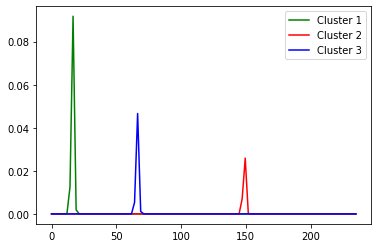

In [18]:
Prueba = GMM()
Prueba.gets_image("src/data/0.jpg")